In [1]:
import spider_web as sw

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

/home/jkim/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/jkim/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
student = pd.read_csv('../data/student.csv')

In [3]:
student.head()

,studentid,entranceyear,finalyear,majors,concentrations,finalmajor,finalconcentration,finalmajor_full,code-semester,me,ece,design,cs,bio
0,10136845,2013,2016,['Undeclared' 'Mechanical Engineering'],[nan],Mechanical Engineering,NaN,Mechanical Engineering,['AHSE1145 1314FA' 'AHSE2141 1314SP' '...,6,1,4,3,1
1,10191843,2014,2015,['Undeclared'],[nan],Undeclared,NaN,Undeclared,['AHSE1145 1415FA' 'AHSE1515 1415SP' '...,3,1,2,1,0
2,10208842,2014,2016,['Undeclared' 'Engineering'],['Computing'],Engineering,Computing,Engineering Computing,['AHSE1199 1415FA' 'AHSE1515 1415SP' '...,0,2,2,3,0
3,10324389,2007,2011,['Undeclared' 'Engineering'],['Self Designed'],Engineering,Self Designed,Engineering Self Designed,['AHSE1199 0708FA' 'AHSE1500 0809FA' '...,2,2,6,1,3
4,10463379,2003,2007,"['Undeclared' ""Electr'l & Computer Engr"" 'Mech...",[nan],Mechanical Engineering,NaN,Mechanical Engineering,['AHS1101 0304FA' 'AHS1111 0304SP' '...,7,2,3,1,0


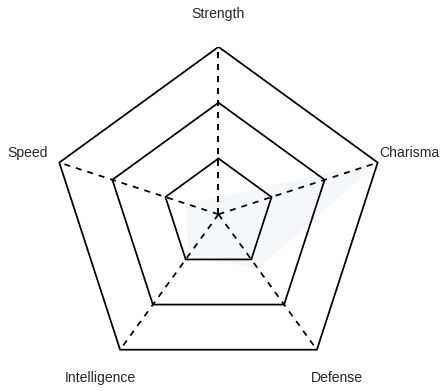

In [4]:
import random

features = ['Strength', 'Speed', 'Intelligence', 'Defense', 'Charisma']
values = [0.1,0.2,0.3,0.4,1]

plt.figure(figsize=(6, 6))
sw.spider_plot(features, values)

Engineering Robotics
[6, 4, 4, 3, 0]


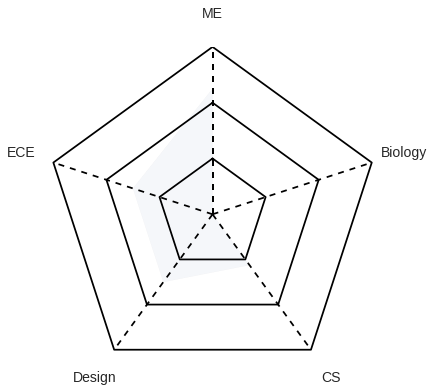

In [5]:
i = 780

features = ['ME','ECE','Design','CS','Biology']
f = ['me','ece','design','cs','bio']
values = student[f].loc[i].tolist()

print student.finalmajor_full.loc[i]
print values

editedvalues = [x/8.0 for x in values]
plt.figure(figsize=(6,6))
sw.spider_plot(features, editedvalues)

each line nested countours represent two courses

In [6]:
majorlist = student['finalmajor_full'].unique()
print majorlist

['Mechanical Engineering ' 'Undeclared ' 'Engineering Computing'
 'Engineering Self Designed' 'Engineering Bioengineering'
 'Engineering Design' "Electr'l & Computer Engr " 'Engineering Systems'
 'Engineering Materials Science' 'Engineering ' 'Engineering Robotics'
 'Engineering_Pending Self Designed' 'Cross-Registration '
 'Engineering_Pending ' 'Engineering_Pending Computing' 'Exchange Student '
 'Engineering_Pending Design']


Mechanical Engineering 
Undeclared 
Engineering Computing
Engineering Self Designed
Engineering Bioengineering
Engineering Design
Electr'l & Computer Engr 


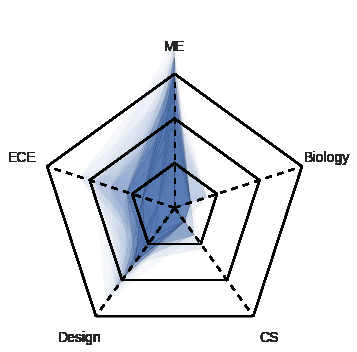

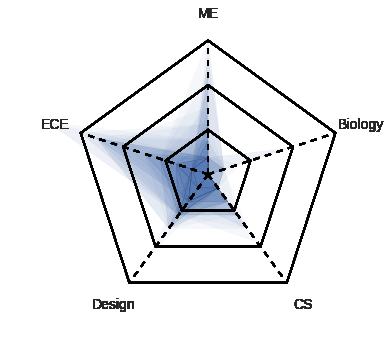

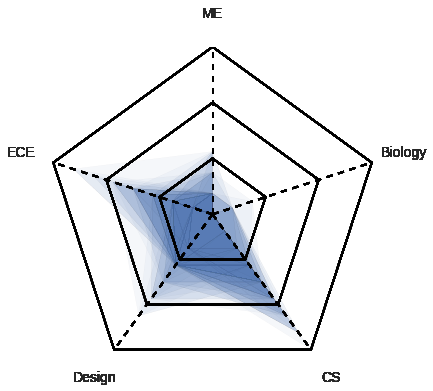

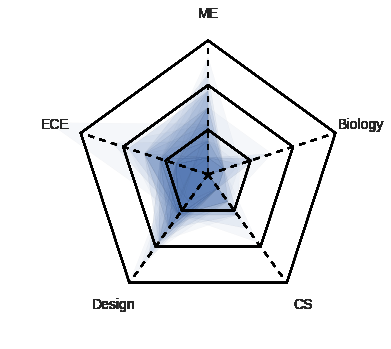

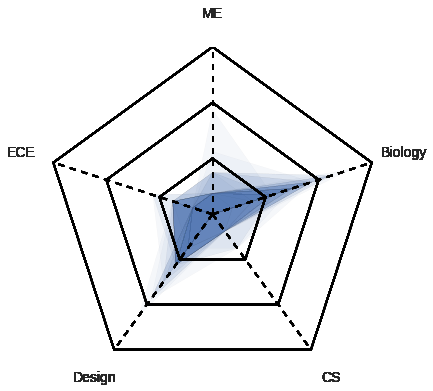

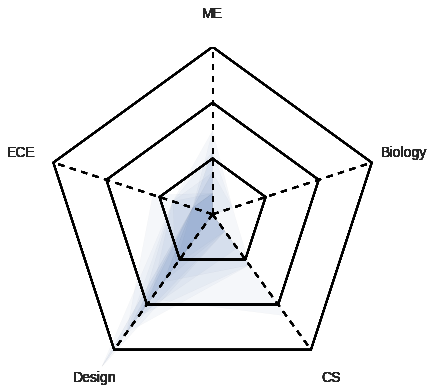

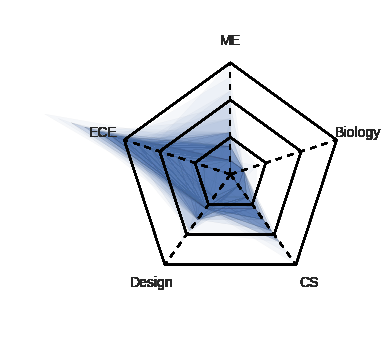

In [7]:
features = ['ME','ECE','Design','CS','Biology']
f = ['me','ece','design','cs','bio']
for each_major in majorlist[0:7]:

    plt.figure(figsize=(6,6))
    majors = student[['me','ece','design','cs','bio','finalmajor_full']].groupby('finalmajor_full')
    for major in majors:
        if major[0] == each_major:
            print major[0]
            for i in major[1].index:
                values = major[1][f].loc[i].tolist()
                editedvalues = [x/8.0 for x in values]
                sw.spider_plot(features, editedvalues)